## Model simuleren: nitrobenzeenmodel

$$\frac{d[C6H6]}{dt}= -2k{[C6H6]}^2[N2O5] + \frac{Q}{V}({[C6H6]}_{in} - [C6H6])$$
$$\frac{d[N2O5]}{dt}= -k{[C6H6]}^2[N2O5] + \frac{Q}{V}({[N2O5]}_{in} - [N2O5])$$
$$\frac{d[C6H5NO2]}{dt}= 2k{[C6H6]}^2[N2O5] - \frac{Q}{V}[C6H5NO2] $$

In [1]:
%matplotlib inline

In [2]:
# Importeren van functionaliteiten
import matplotlib.pyplot as plt
#import seaborn as sns
import numpy as np
import scipy as sp
import pandas as pd
import math
from IPython.display import Image
from ipywidgets import interact, fixed, FloatSlider
%load_ext autoreload
%autoreload 1

In [3]:
import sys
import os
sys.path.append("functions")
%aimport general_functions
%aimport nitrobenzeen

In [4]:
functie_afgeleiden = nitrobenzeen.model_afgeleiden

#### Praktische info
Functiedefinitie:

    nitrobenzeen.nitrobenzeen_model(tijdstappen, C6H6_0, N2O5_0, C6H5NO2_0, k, Q, V, C6H6_in, N2O5_in)

Bij de standaard situatie voor onze case werden volgende waarden voor initiele condities, parameters en inputs gebruikt:

    nitrobenzeen.nitrobenzeen_model(np.arange(0, 1500, 1), 0.03, 0, 0, 2, 10, 3000, 0, 0.03) 

## Model simuleren

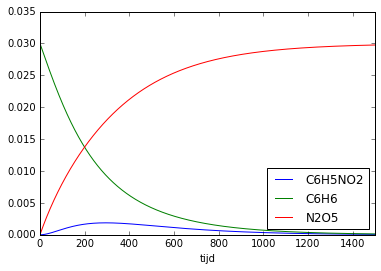

In [6]:
df, _ = general_functions.model(
    np.arange(0, 1500, 1), # tijdstappen
    [0.03, 0, 0], # initiële condities
    ['C6H6','N2O5', 'C6H5NO2'], # namen variabelen
    functie_afgeleiden, # naam functie afgeleiden
    returnDataFrame=True, plotresults=True,
    # vanaf hier: functie specifieke parameters
    k=2, Q=10, V=3000, C6H6_in=0, N2O5_in=0.03)

$$\frac{d[C6H6]}{dt}= -2k{[C6H6]}^2[N2O5] + \frac{Q}{V}({[C6H6]}_{in} - [C6H6])$$
$$\frac{d[N2O5]}{dt}= -k{[C6H6]}^2[N2O5] + \frac{Q}{V}({[N2O5]}_{in} - [N2O5])$$
$$\frac{d[C6H5NO2]}{dt}= 2k{[C6H6]}^2[N2O5] - \frac{Q}{V}[C6H5NO2] $$

## Impact initiële conditie

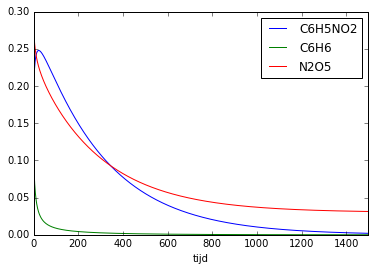

In [8]:
def interactive_model(C6H6, N2O5, C6H5NO2):
    general_functions.model(
        np.arange(0, 1500, 1), # tijdstappen
        [C6H6, N2O5, C6H5NO2], # initiële condities
        ['C6H6','N2O5', 'C6H5NO2'], # namen variabelen
        functie_afgeleiden, # naam functie afgeleiden
        returnDataFrame=True, plotresults=True,
        # vanaf hier: functie specifieke parameters
        k=2, Q=10, V=3000, C6H6_in=0, N2O5_in=0.03)
interact(interactive_model,
         C6H6=FloatSlider(value=0.1, min=0, max=1, step=0.01, description='C6H6', continuous_update=False),
         N2O5=FloatSlider(value=0.1, min=0, max=1, step=0.01, description='N2O5', continuous_update=False),
         C6H5NO2=FloatSlider(value=0.1, min=0, max=1, step=0.01, description='C6H5NO2', continuous_update=False))

$$\frac{d[C6H6]}{dt}= -2k{[C6H6]}^2[N2O5] + \frac{Q}{V}({[C6H6]}_{in} - [C6H6])$$
$$\frac{d[N2O5]}{dt}= -k{[C6H6]}^2[N2O5] + \frac{Q}{V}({[N2O5]}_{in} - [N2O5])$$
$$\frac{d[C6H5NO2]}{dt}= 2k{[C6H6]}^2[N2O5] - \frac{Q}{V}[C6H5NO2] $$

## Impact inputs

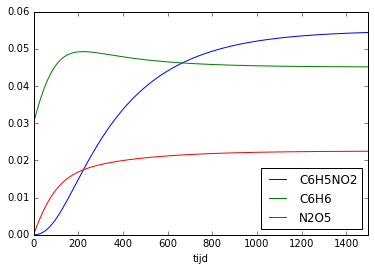

In [10]:
interact(general_functions.model,
         tijdstappen=fixed(np.arange(0, 1500, 1)),
         init=fixed([0.03, 0, 0]), varnames=fixed(['C6H6','N2O5', 'C6H5NO2']),
         f=fixed(functie_afgeleiden),
         returnDataFrame=fixed(False), plotresults=fixed(True),
         k=fixed(2), Q=fixed(10), V=fixed(3000),
         C6H6_in=FloatSlider(value=0.1, min=0., max=1, step=0.1, name='b', continuous_update=False),
         N2O5_in=FloatSlider(value=0.03, min=0., max=0.05, step=0.01, name='m', continuous_update=False))

$$\frac{d[C6H6]}{dt}= -2k{[C6H6]}^2[N2O5] + \frac{Q}{V}({[C6H6]}_{in} - [C6H6])$$
$$\frac{d[N2O5]}{dt}= -k{[C6H6]}^2[N2O5] + \frac{Q}{V}({[N2O5]}_{in} - [N2O5])$$
$$\frac{d[C6H5NO2]}{dt}= 2k{[C6H6]}^2[N2O5] - \frac{Q}{V}[C6H5NO2] $$

## Impact parameters

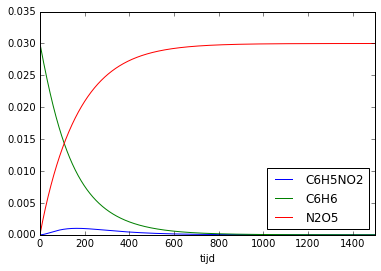

In [11]:
interact(general_functions.model,
         tijdstappen=fixed(np.arange(0, 1500, 1)),
         init=fixed([0.03, 0, 0]), varnames=fixed(['C6H6','N2O5', 'C6H5NO2']),
         f=fixed(functie_afgeleiden),
         returnDataFrame=fixed(False), plotresults=fixed(True),
         C6H6_in=fixed(0), N2O5_in=fixed(0.03),
         k=FloatSlider(value=1, min=0., max=10, step=0.1, name='b', continuous_update=False),
         Q=FloatSlider(value=10, min=0., max=20, step=1, name='m', continuous_update=False),
         V=FloatSlider(value=1500, min=0., max=6000, step=100, name='m', continuous_update=False))

$$\frac{d[C6H6]}{dt}= -2k{[C6H6]}^2[N2O5] + \frac{Q}{V}({[C6H6]}_{in} - [C6H6])$$
$$\frac{d[N2O5]}{dt}= -k{[C6H6]}^2[N2O5] + \frac{Q}{V}({[N2O5]}_{in} - [N2O5])$$
$$\frac{d[C6H5NO2]}{dt}= 2k{[C6H6]}^2[N2O5] - \frac{Q}{V}[C6H5NO2] $$

# sensitivity

In [13]:
df_sens = general_functions.sensitiviteit(
    np.arange(0, 1500, 1), # tijdstappen
    [0.03, 0, 0], # initiële condities
    ['C6H6','N2O5', 'C6H5NO2'], # namen variabelen
    functie_afgeleiden, # naam functie afgeleiden
    parameternaam='N2O5_in',
    # vanaf hier: functie specifieke parameters
    k=2, Q=10, V=3000, C6H6_in=0, N2O5_in=0.03)

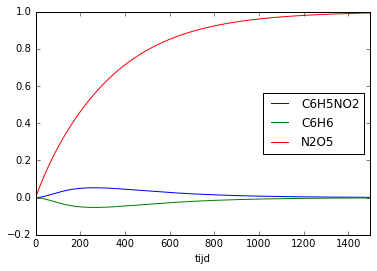

In [14]:
df_sens.plot()